# playground_s5e1

# ライブラリのインポート

In [ ]:
%%bash
pip uninstall lightgbm --yes
pip install lightgbm \
    --no-binary lightgbm \
    --no-cache lightgbm \
    --config-settings=cmake.define.USE_CUDA=ON

pip install catboost -qq
pip install seaborn_qqplot -qq
pip install japanize-matplotlib optuna mojimoji optuna pymysql -qq
pip install optuna -qq
pip install optuna-integration -qq
pip install category_encoders -qq
pip install skorch -qq
pip install shirokumas -qq
pip install shap -qq
pip install jaconv -qq
pip install hydra-core -qq
pip install pyyaml -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import catboost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import functools
import datetime
from dateutil.parser import parse
import japanize_matplotlib
import optuna
import mojimoji as mjmj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
from pathlib import Path
import os
import re
import pickle
import math
from math import sqrt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
import skorch
import torch
from torch import nn
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from skorch import NeuralNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import jaconv
import unicodedata
import hydra
import sys
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from skorch import NeuralNetRegressor
from catboost import CatBoostRegressor
from omegaconf import OmegaConf, DictConfig
import yaml

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 生データのデータフレーム化

In [ ]:
import pandas as pd
base_path = "/content/drive/MyDrive/kaggle/playground_s5e1"
row_tr_df = pd.read_csv(f"{base_path}/data/train.csv")
row_test_df = pd.read_csv(f"{base_path}/data/test.csv")
row_sample_df = pd.read_csv(f"{base_path}/data/sample_submission.csv", header=None)

tr_df = row_tr_df.copy()
test_df = row_test_df.copy()

for col in tr_df.keys():
    col_l = col.lower()
    tr_df.rename(columns={col: col_l}, inplace=True)
    test_df.rename(columns={col: col_l}, inplace=True)

tr_df_cp = tr_df.copy()
test_df_cp = test_df.copy()

In [ ]:
def check_na(inp_df):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            n_nan= df[col].isna().sum()
            print(f"NaNは{n_nan}個あります。")
        else:
            print("NaNなし")
        print("------------------\n")


def check_and_clean_na(inp_df, fill_na=False):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            if fill_na:
                if isinstance(df[col][0], str):
                    df[col] = df[col].fillna(df[col].mode()[0])
                else:
                    df[col] = df[col].fillna(df[col].mean())
            else:
                df = df.dropna(subset=[col])
        else:
            print("NaNなし")
        print("------------------\n")

    return df

In [ ]:
tr_df = tr_df_cp.copy()
test_df = test_df_cp.copy()
tr_df = check_and_clean_na(tr_df).reset_index(drop=True)
test_df = check_and_clean_na(test_df, fill_na=True).reset_index(drop=True)

id
NaNなし
------------------

date
NaNなし
------------------

country
NaNなし
------------------

store
NaNなし
------------------

product
NaNなし
------------------

num_sold
NaNあり
------------------

id
NaNなし
------------------

date
NaNなし
------------------

country
NaNなし
------------------

store
NaNなし
------------------

product
NaNなし
------------------



# データの可視化

In [ ]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x, "notbinned"

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 6:
        binned_x = pd.Series([str(val) for val in x])
        return binned_x, "notbinned"
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

        return binned_x, "binned"

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_df=False, show_fig=True):
    bin_values = {}
    notbinned_cols = []
    binned_cols = []
    tr_df_cp = tr_df.copy()
    test_df_cp = test_df.copy()

    id_lst = list(tr_df_cp.id.values)
    id_lst += list(test_df_cp.id.values)
    id_lst = sorted(id_lst)
    add_binned_df = pd.DataFrame(id_lst, columns=["id"])
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]

    for i, col in enumerate(cols):
        plot_map = {}
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_cp.index[-1]
        all_df = pd.concat([tr_df_cp, test_df_cp], ignore_index=True)
        all_values = all_df[col]
        all_binned_values, is_binned = get_binned_data(all_values, col, bins)
        if is_binned == "binned":
            print(col)
            binned_cols.append(col)
            add_binned_df[[f"binned_{col}"]] = all_binned_values
        all_df[f"binned_{col}"] = all_binned_values.values
        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]
        tr_plot_data = tr_binned_values.value_counts() / tr_df_cp.shape[0]
        tr_plot_data = tr_plot_data.to_dict()
        tr_plot_data = sorted(tr_plot_data.items())
        tr_plot_data = pd.DataFrame(tr_plot_data, columns=[f"binned_{col}", "train_val_rate"])
        tr_plot_data = tr_plot_data.set_index(f"binned_{col}")
        test_plot_data = test_binned_values.value_counts() / test_df_cp.shape[0]
        test_plot_data = test_plot_data.to_dict()
        test_plot_data = sorted(test_plot_data.items())
        test_plot_data = pd.DataFrame(test_plot_data, columns=[f"binned_{col}", "test_val_rate"])
        test_plot_data = test_plot_data.set_index(f"binned_{col}")
        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = test_plot_data.fillna(0)
        if col != trgt_y:
            tmp_df = all_df[[col, f"binned_{col}"]].copy()
            y_rate_df = all_df[[col, trgt_y, f"binned_{col}"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)
            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index(f"binned_{col}", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)
        w = 0.4
        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]
        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes
        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]
        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]
        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')
        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]
        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')
        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x
        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)
        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        ax.set_xlabel(f"{col}", fontsize=7.5)
        ax.axes.xaxis.set_ticklabels([])
        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")
    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)
    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_df:
        if len(binned_cols) > 0:
            tr_df = pd.merge(tr_df, add_binned_df, on="id", how="left")
            test_df = pd.merge(test_df, add_binned_df, on="id", how="left")
        return tr_df, test_df, bin_values
    else:
        return bin_values

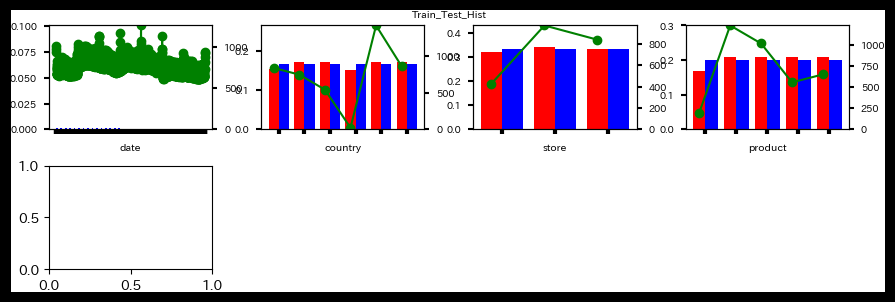

In [ ]:
trgt_y = 'num_sold'
trgt_cols = []
tmp_tr, tmp_test, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_cols, row_num=5, col_num=4, bins=10, return_df=True)

# 特徴量エンジニアリング

In [ ]:
def clean_date(s):
    year, month, day = s.split("-")
    year = int(year)
    month = int(month)
    day = int(day)
    return year, month, day

tr_df[["year", "month", "day"]] = tr_df["date"].apply(clean_date).apply(pd.Series)
test_df[["year", "month", "day"]] = test_df["date"].apply(clean_date).apply(pd.Series)

def add_season(s):
    if s in [12, 1, 2]:
        s = "winter"
    elif s in [3, 4, 5]:
        s = "spring"
    elif s in [3, 4, 5]:
        s = "summer"
    else:
        s = "autumn"
    return s

def add_sin_cos_col(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

tr_df = add_sin_cos_col(tr_df, "month", 12)
test_df = add_sin_cos_col(test_df, "month", 12)
tr_df = add_sin_cos_col(tr_df,"day", 31)
test_df = add_sin_cos_col(test_df,"day", 31)

tr_df["season"] = tr_df["month"].apply(add_season).apply(pd.Series)
tr_df['weekday'] = pd.to_datetime(tr_df['date']).dt.dayofweek
test_df["season"] = test_df["month"].apply(add_season).apply(pd.Series)
test_df['weekday'] = pd.to_datetime(test_df['date']).dt.dayofweek
tr_df = tr_df.sort_values(by=["country", "store", "product", "year", "month", "day"], ascending=True).reset_index(drop=True)
test_df = test_df.sort_values(by=["country", "store", "product", "year", "month", "day"], ascending=True).reset_index(drop=True)

In [ ]:
_tr_df_1 = tr_df.copy()
_test_df_1 = test_df.copy()

In [ ]:
tr_df["lag_1_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(1)
tr_df["lag_7_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(7)
tr_df["lag_365_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(365)
tr_df["rolling_mean_num_sold_7"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
tr_df["rolling_mean_num_sold_30"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
tr_df["rolling_mean_num_sold_365"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=365, min_periods=1).mean())

tr_df["lag_1_num_sold"] = tr_df["lag_1_num_sold"].fillna(tr_df["lag_1_num_sold"].mean())
tr_df["lag_7_num_sold"] = tr_df["lag_7_num_sold"].fillna(tr_df["lag_7_num_sold"].mean())
tr_df["lag_365_num_sold"] = tr_df["lag_365_num_sold"].fillna(tr_df["lag_365_num_sold"].mean())
tr_df["rolling_mean_num_sold_7"] = tr_df["rolling_mean_num_sold_7"].fillna(tr_df["rolling_mean_num_sold_7"].mean())
tr_df["rolling_mean_num_sold_30"] = tr_df["rolling_mean_num_sold_30"].fillna(tr_df["rolling_mean_num_sold_30"].mean())
tr_df["rolling_mean_num_sold_365"] = tr_df["rolling_mean_num_sold_365"].fillna(tr_df["rolling_mean_num_sold_365"].mean())


In [ ]:
def add_lags_test(inp_tr_df, inp_test_df, lag_col):
    tr_df = inp_tr_df.copy()
    test_df = inp_test_df.copy()
    a_df = tr_df.groupby(["country", "store", "product"])[f"{lag_col}"].agg(["mean", "std"]).reset_index(drop=True)
    b_df = tr_df[["country", "store", "product"]].drop_duplicates(ignore_index=True)
    c_df = pd.concat([a_df, b_df], axis=1)
    test_df = pd.merge(test_df, c_df, on=["country", "store", "product"], how="left")
    test_df["mean"] = test_df["mean"].fillna(test_df["mean"].mean())
    test_df["std"] = test_df["std"].fillna(test_df["mean"].mean())
    test_df[f"{lag_col}"] = test_df.apply(
        lambda row: np.random.normal(row["mean"], row["std"], size=1)[0], axis=1).apply(lambda x: round(abs(x)))
    test_df.drop(["mean", "std"], axis=1, inplace=True)
    return test_df

In [ ]:
tr_df = _tr_df.copy()
test_df = _test_df.copy()

In [ ]:
for lag_col in ["lag_1_num_sold", "lag_7_num_sold", "lag_365_num_sold", "rolling_mean_num_sold_7", "rolling_mean_num_sold_30", "rolling_mean_num_sold_365"]:
    test_df = add_lags_test(tr_df, test_df, lag_col)

In [ ]:
def add_trgtencd(inp_tr_df, inp_test_df, grby_cols, trgt_col):

    # inp_tr_dfのkeyの結合
    if isinstance(grby_cols, str):
        grby_cols = [grby_cols]
    tr_df = inp_tr_df.copy()
    test_df = inp_test_df.copy()
    df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()
    if len(grby_cols) > 0:
        grby_cols_key =   "_".join(grby_cols)
    else:
        grby_cols_key = grby_cols[0]
    df = df.rename(f"{grby_cols_key}_mean_{trgt_col}")
    df_index = df.index
    df_2 = pd.DataFrame(df.values, columns = [f"{grby_cols_key}_mean_{trgt_col}"])
    df_2["tmp_key"] = df_index
    df_2["tmp_key"] = df_2["tmp_key"].apply(lambda x: "_".join(list(x)))
    tr_df["tmp_key"] = tr_df[grby_cols].agg("_".join, axis=1)
    test_df["tmp_key"] = test_df[grby_cols].agg("_".join, axis=1)
    tr_df = pd.merge(tr_df, df_2, on=["tmp_key"], how='left')
    test_df = pd.merge(test_df, df_2, on=["tmp_key"], how='left')
    tr_df[f"{grby_cols_key}_mean_{trgt_col}"] = tr_df[f"{grby_cols_key}_mean_{trgt_col}"].fillna(tr_df[f"{grby_cols_key}_mean_{trgt_col}"].mean())
    test_df[f"{grby_cols_key}_mean_{trgt_col}"] = test_df[f"{grby_cols_key}_mean_{trgt_col}"].fillna(test_df[f"{grby_cols_key}_mean_{trgt_col}"].mean())
    tr_df.drop("tmp_key", axis=1, inplace=True)
    test_df.drop("tmp_key", axis=1, inplace=True)

    return tr_df, test_df

In [ ]:
cate_cols = ["date", "country", "store", "product", "year", "month", "day", "season", "weekday"]
tr_df[cate_cols] = tr_df[cate_cols].astype("category")
test_df[cate_cols] = test_df[cate_cols].astype("category")

def cnvrt_cate_col_val(df, cate_cols):
    for col in cate_cols:
        df[col] = df[col].apply(lambda x: str(x) if not isinstance(x, str) else x)
    return df

tr_df = cnvrt_cate_col_val(tr_df, cate_cols)
test_df = cnvrt_cate_col_val(test_df, cate_cols)

In [ ]:
tr_df, test_df = add_trgtencd(tr_df, test_df, ["country", "store", "product"], "num_sold")

<ipython-input-9-eee980e65fd3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()


In [ ]:
tr_df, test_df = add_trgtencd(tr_df, test_df, ["country", "store", "season"], "num_sold")

<ipython-input-9-eee980e65fd3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()


In [ ]:
exp_id = 2
base_path = Path(f"/content/drive/MyDrive/kaggle/playground_s5e1/")
tmp_dir = base_path / "data/cleaned_data"
tmp_dir.mkdir(parents=True, exist_ok=True)
with open(base_path / f"data/cleaned_data/cleaned_tr_df_exp_{exp_id}.pickle", 'wb') as f:
    pickle.dump(tr_df, f)
with open(base_path / f"data/cleaned_data/cleaned_test_df_exp_{exp_id}.pickle", 'wb') as f:
    pickle.dump(test_df, f)

# 学習の実行

In [ ]:
! python3 /content/drive/MyDrive/kaggle/playground_s5e1/utility/main.py 2

ストリーミング出力は最後の 5000 行に切り捨てられました。

///// now...level_1_xgbreg_local_study_2_fold_cv /////
★ level_1_xgbreg_LOCAL_TRIAL_1 strat...
[0]	validation_0-mae:75.82167	validation_1-mae:66.81565
[9]	validation_0-mae:54.86501	validation_1-mae:55.39689
loss____: 0.07690477615701145
[I 2025-02-19 06:42:12,370] Trial 0 finished with value: 0.07690477615701145 and parameters: {}. Best is trial 0 with value: 0.07690477615701145.
-------
0.07690477615701145
-------

///// now...level_1_xgbreg_local_study_3_fold_cv /////
★ level_1_xgbreg_LOCAL_TRIAL_1 strat...
[0]	validation_0-mae:73.80439	validation_1-mae:82.36919
[9]	validation_0-mae:53.77243	validation_1-mae:68.40461
loss____: 0.07299724941056963
[I 2025-02-19 06:42:12,422] Trial 0 finished with value: 0.07299724941056963 and parameters: {}. Best is trial 0 with value: 0.07299724941056963.
-------
0.07299724941056963
-------
///// now...level_1_xgbreg_local_study_all_done ! /////
[I 2025-02-19 06:42:12,502] Trial 0 finished with value: 0.0743368402237

In [ ]:
# base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
run_id = 7
with open(base_path / f"output/exp/exp_1/run_{run_id}/tr_df.pickle", 'rb') as f:
    s_tr_df = pickle.load(f)

with open(base_path / f"output/exp/exp_1/run_{run_id}/test_df.pickle", 'rb') as f:
    s_test_df = pickle.load(f)

with open(base_path / f"output/exp/exp_1/run_{run_id}/output_path.pickle", 'rb') as f:
    output_path = pickle.load(f)

In [ ]:
from sklearn.metrics import mean_absolute_error

def eval_mae_score(tr_df, trgt_y):
    score = mean_absolute_error(tr_df[f"{trgt_y}"].values, tr_df[f"{trgt_y}_pred"].values)
    return score


trgt_y = "num_sold"
eval_mae_score(s_tr_df, trgt_y)

6.120566126467949

# submit

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df):
    submit_df = row_sample_df.copy()
    submit_df = submit_df.drop(1, axis=1)
    exp_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d{1,3})", str(output_path))[0]
    save_path = output_path / f"submit_exp_{exp_id}_{run_id}.csv"

    df = trgt_df[["id", f"{trgt_y}_pred"]]
    df = df.rename(columns={"id": 0, f"{trgt_y}_pred": 1})
    df[0] = df[0].apply(lambda x: str(x))
    submit_df = pd.merge(submit_df, df, on=0, how="left")
    submit_df[1][0] = "num_sold"
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=False)
    return submit_df

save_submit(output_path, s_test_df, trgt_y, row_sample_df)

<ipython-input-47-ab8a2f8369aa>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_df[1][0] = "num_sold"
<ipython-input-47-ab8a2f8369aa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,0,1
0,id,num_sold
1,230130,878.743408
2,230131,669.486145
3,230132,690.044434
4,230133,239.717728
...,...,...
98546,328675,303.93515
98547,328676,2258.800781
98548,328677,2027.406616
98549,328678,768.71698
